<a href="https://colab.research.google.com/github/seaandtide-dotcom/jhjhjh/blob/main/Fig_5_%E5%BD%92%E4%B8%80%E6%8C%A0%E5%BA%A6%E8%BD%AE%E5%BB%93%E5%9B%BE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# —— 可选：在 Colab 安装 Times New Roman（需要网络）
# !apt-get update -qq
# !apt-get install -yqq ttf-mscorefonts-installer fontconfig
# !fc-cache -f -v

import matplotlib as mpl, matplotlib.pyplot as plt

# 使用 Times New Roman（若不可用则回退到 Times/Nimbus Roman/STIX/DejaVu Serif）
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.serif"] = [
    "Times New Roman", "Times", "Nimbus Roman", "STIX Two Text", "DejaVu Serif"
]

# 让数学公式与正文风格统一（可选）
mpl.rcParams["mathtext.fontset"] = "stix"   # STIX 套系与 Times 视觉匹配
mpl.rcParams["mathtext.rm"] = "Times New Roman"

# 解决负号显示
mpl.rcParams["axes.unicode_minus"] = False

# 导出矢量图时嵌入 TrueType（提高期刊兼容性，可选）
mpl.rcParams["pdf.fonttype"] = 42
mpl.rcParams["ps.fonttype"] = 42


/tmp/ipython-input-3271873709.py:134: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, 0.78, 0.94])


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/Kim_Normalised_20C_Vertical_SI_mm.png'

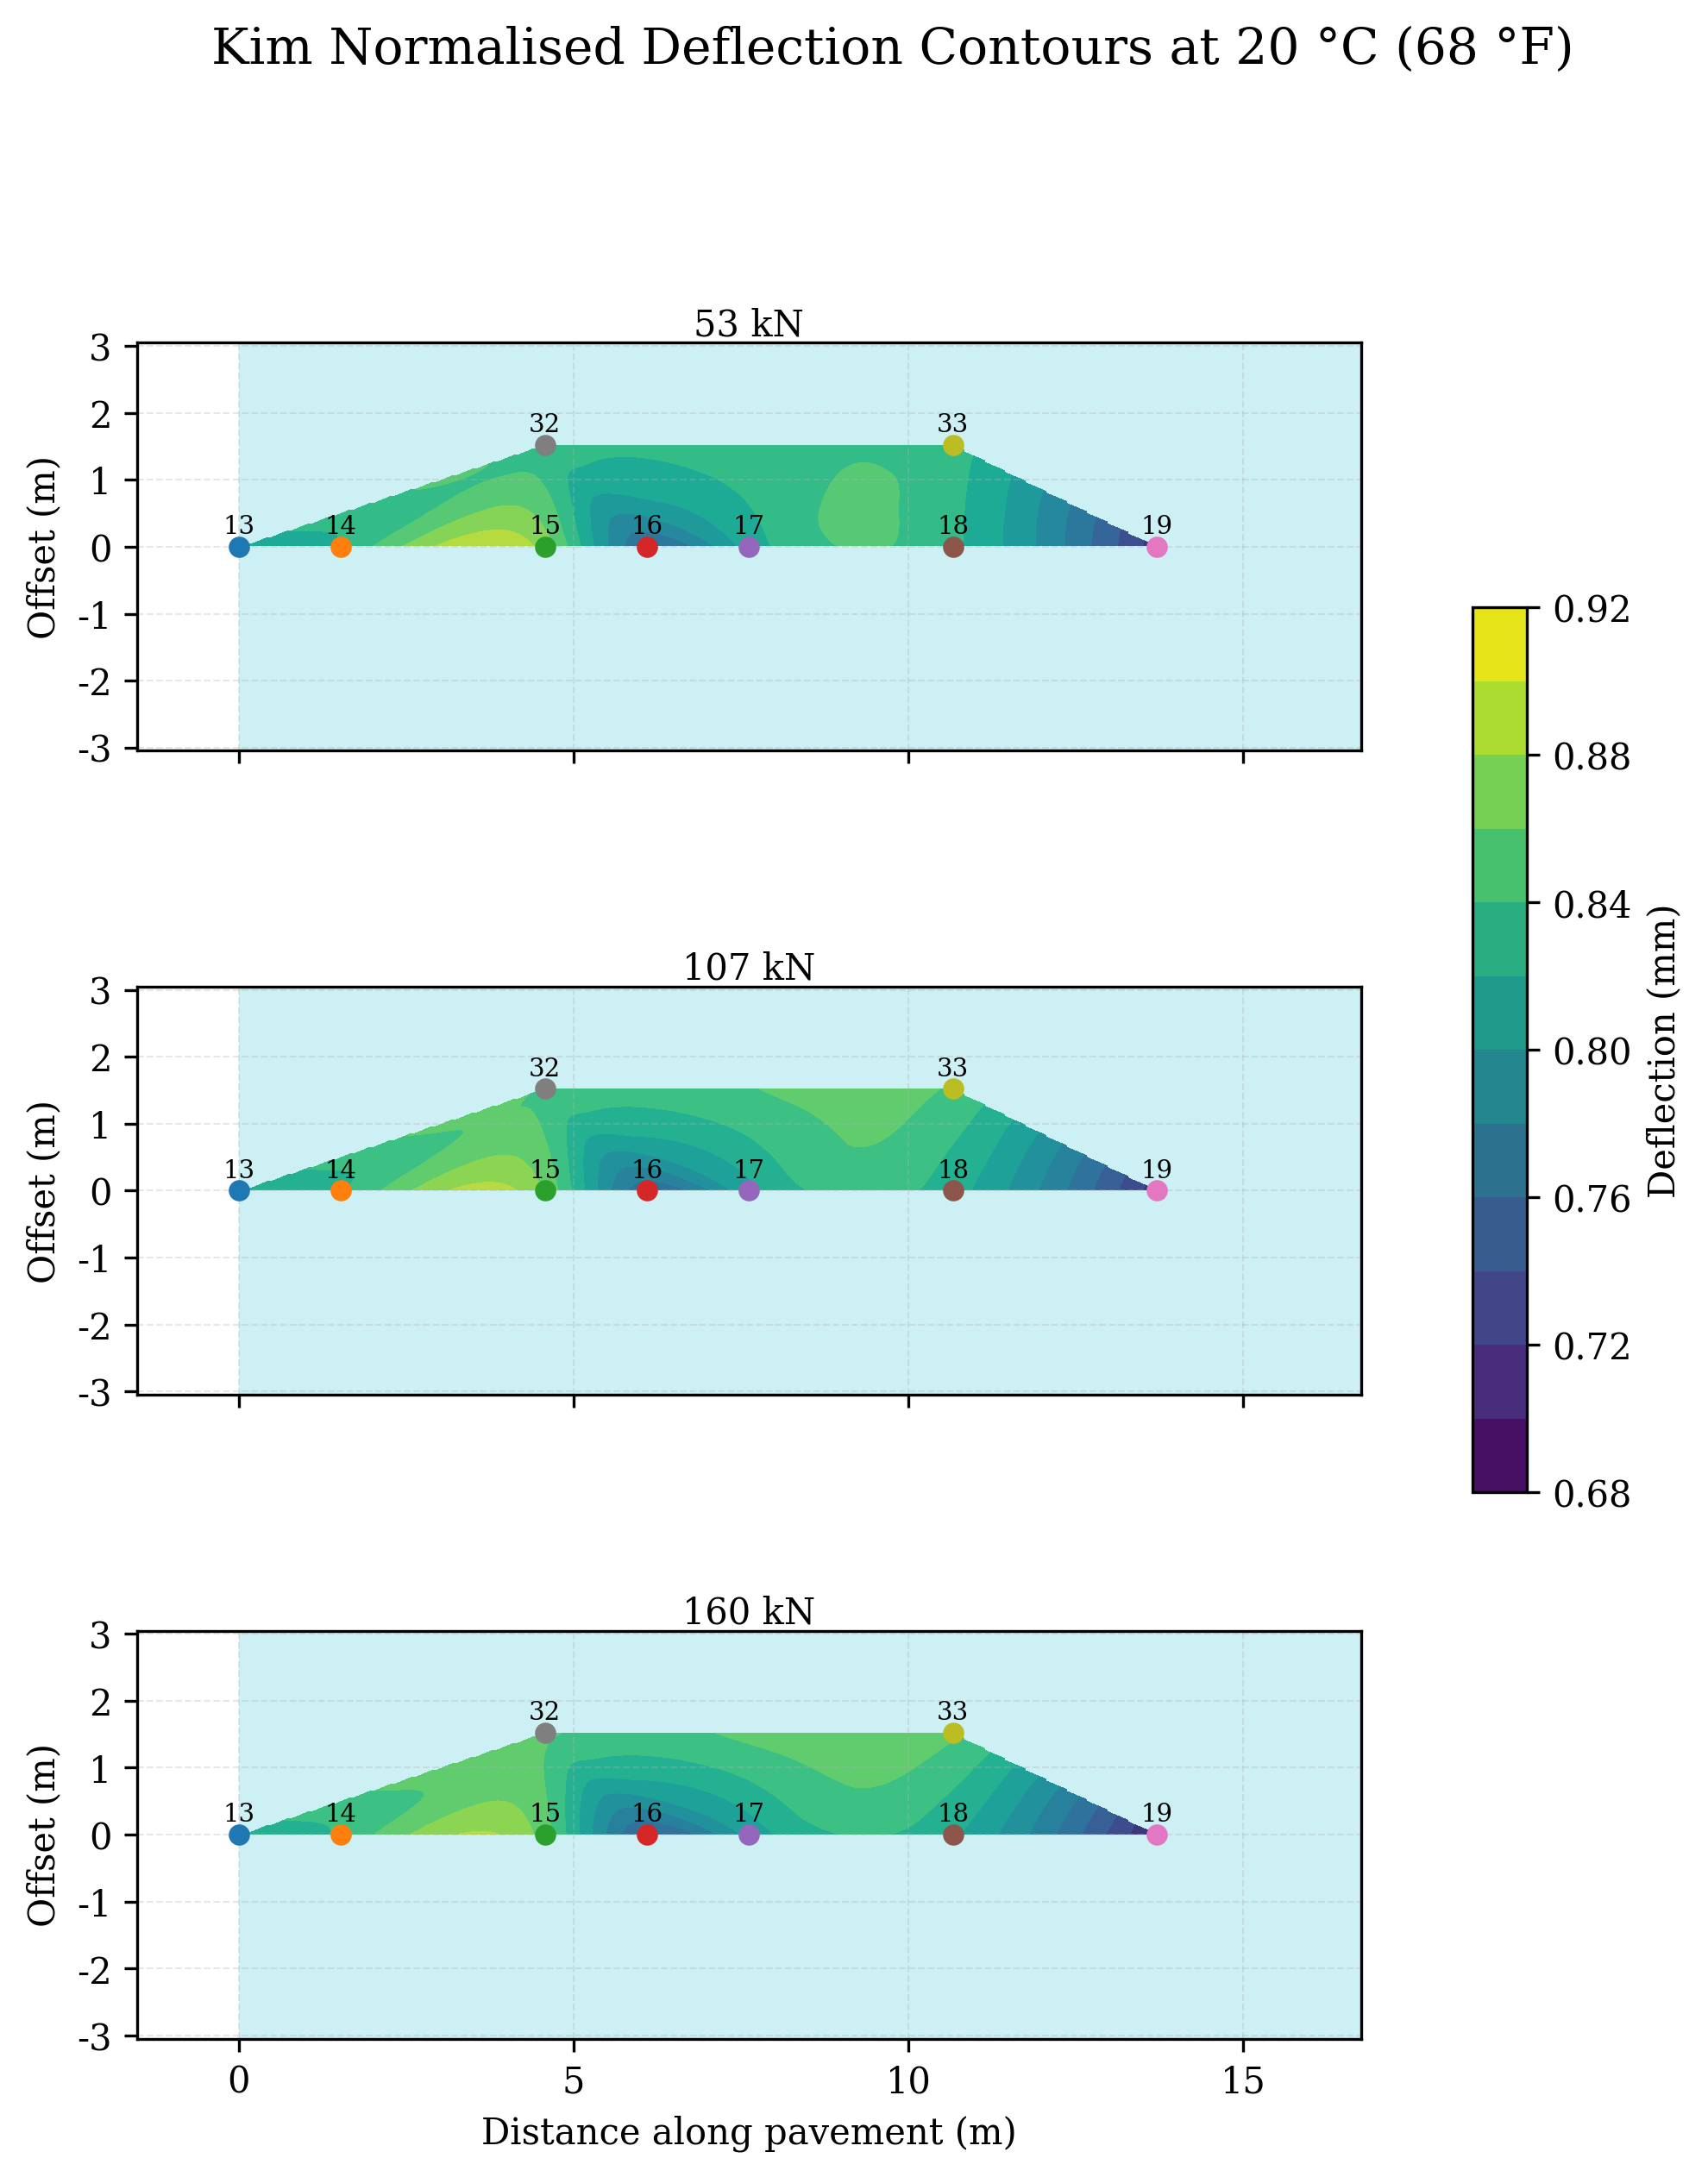

In [ ]:
# —— 可选：在 Colab 安装 Times New Roman（需要网络）
# !apt-get update -qq
# !apt-get install -yqq ttf-mscorefonts-installer fontconfig
# !fc-cache -f -v

import matplotlib as mpl, matplotlib.pyplot as plt

# 使用 Times New Roman（若不可用则回退到 Times/Nimbus Roman/STIX/DejaVu Serif）
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.serif"] = [
    "Times New Roman", "Times", "Nimbus Roman", "STIX Two Text", "DejaVu Serif"
]

# 让数学公式与正文风格统一（可选）
mpl.rcParams["mathtext.fontset"] = "stix"   # STIX 套系与 Times 视觉匹配
mpl.rcParams["mathtext.rm"] = "Times New Roman"

# 解决负号显示
mpl.rcParams["axes.unicode_minus"] = False

# 导出矢量图时嵌入 TrueType（提高期刊兼容性，可选）
mpl.rcParams["pdf.fonttype"] = 42
mpl.rcParams["ps.fonttype"] = 42


# Data (mil) and coordinates (ft)
rows = [
    (13,10.86,21.94,32.62),
    (14,10.74,21.74,32.45), (14,10.96,21.95,32.73),
    (14,11.28,23.04,34.00), (14,11.29,22.81,33.73),
    (15,13.26,25.92,37.23), (15, 9.55,19.22,28.59),
    (15,12.49,24.72,35.92), (15,12.99,25.96,37.35),
    (15, 9.76,19.75,29.06), (15,12.79,25.67,37.02),
    (16, 9.71,19.48,28.98), (16, 9.70,19.36,28.72),
    (16,10.04,20.29,29.73),
    (17, 9.79,19.76,29.26), (17, 9.84,19.81,29.40),
    (17,13.14,25.91,36.99), (17,10.55,21.18,31.27),
    (18,11.74,23.15,33.85), (18,10.43,21.02,30.94),
    (19, 8.96,18.03,26.71), (19, 8.92,17.93,26.63), (19, 8.99,17.93,26.47),
    (32,11.46,23.47,34.92), (32,10.93,22.43,33.11),
    (33,11.29,23.28,34.56), (33,11.00,22.59,33.46)
]

from collections import defaultdict
def aggregate(col_idx):
    sums, counts = defaultdict(float), defaultdict(int)
    for tp, v53, v107, v160 in rows:
        val = [v53, v107, v160][col_idx]
        sums[tp] += val
        counts[tp] += 1
    return {tp: sums[tp] / counts[tp] for tp in sums}

LABELS = ["53 kN", "107 kN", "160 kN"]
data_dict_mil = {
    LABELS[0]: aggregate(0),
    LABELS[1]: aggregate(1),
    LABELS[2]: aggregate(2)
}

# Coordinates (ft → m)
FT2M = 0.3048
coords_ft = {
    13:(0,0), 14:(5,0), 15:(15,0), 16:(20,0),
    17:(25,0), 18:(35,0), 19:(45,0),
    32:(15,5), 33:(35,5)
}
coords_m = {k:(x*FT2M, y*FT2M) for k,(x,y) in coords_ft.items()}

# Grid (ft for interpolation; m for plotting)
import numpy as np
xi_ft = np.linspace(-5, 55, 300)
yi_ft = np.linspace(-10, 10, 240)
X_ft, Y_ft = np.meshgrid(xi_ft, yi_ft)
X_m, Y_m = X_ft * FT2M, Y_ft * FT2M

# Interpolator
try:
    from scipy.interpolate import griddata as _griddata
    def interp(points_ft, values, XI_ft):
        return _griddata(points_ft, values, XI_ft, method="cubic")
except Exception:
    def interp(points_ft, values, XI_ft):
        xi, yi = XI_ft
        x = points_ft[:,0][:,None,None]
        y = points_ft[:,1][:,None,None]
        xv = xi[None,:,:]
        yv = yi[None,:,:]
        d2 = (xv - x)**2 + (yv - y)**2 + 1e-12
        w = 1.0 / d2
        return np.sum(w * values[:,None,None], axis=0) / np.sum(w, axis=0)

# Unit conversion: mil → mm (1 mil = 0.0254 mm)
MIL2MM = 0.0254

fig, axes = plt.subplots(3, 1, figsize=(7, 9), dpi=300)

for idx, (ax, (label, vals_mil)) in enumerate(zip(axes, data_dict_mil.items())):
    points_ft = np.array([coords_ft[p] for p in vals_mil], dtype=float)
    values_mm = np.array(list(vals_mil.values()), dtype=float) * MIL2MM
    Z_mm = interp(points_ft, values_mm, (X_ft, Y_ft))

    im = ax.contourf(X_m, Y_m, Z_mm, levels=12)  # default colormap

    # Points & labels
    for p, (xm, ym) in coords_m.items():
        ax.scatter(xm, ym, s=24, zorder=5)
        ax.text(xm, ym + 0.12, str(p), ha="center", va="bottom", fontsize=7)

    # Pavement footprint
    ax.fill_between([0*FT2M, 55*FT2M], -12*FT2M, 12*FT2M, alpha=0.22)

    ax.set_xlim(xi_ft.min()*FT2M, xi_ft.max()*FT2M)
    ax.set_ylim(yi_ft.min()*FT2M, yi_ft.max()*FT2M)
    ax.set_aspect("equal")
    ax.grid(alpha=0.3, linestyle="--", linewidth=0.5)

    ax.set_title(label, fontsize=10, pad=2)
    ax.set_ylabel("Offset (m)")
    ax.set_xticks(np.arange(0, 17, 5))
    ax.set_yticks(np.arange(-3, 3.1, 1))

    if idx < 2:
        ax.set_xticklabels([])

axes[-1].set_xlabel("Distance along pavement (m)")

# Colorbar
fig.subplots_adjust(hspace=0.15, right=0.78)
cbar_ax = fig.add_axes([0.82, 0.33, 0.03, 0.38])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label("Deflection (mm)")

fig.suptitle("Kim Normalised Deflection Contours at 20 °C (68 °F)", fontsize=14, y=0.96)
fig.tight_layout(rect=[0, 0, 0.78, 0.94])

# Save
save_path = "/mnt/data/Kim_Normalised_20C_Vertical_SI_mm.png"
fig.savefig(save_path, dpi=600, bbox_inches="tight")
print("✅  Saved:", save_path)

plt.show()

save_path


In [ ]:
from pathlib import Path
out_dir = Path("/content/figures")          # 或你想要的目录
out_dir.mkdir(parents=True, exist_ok=True)

png_path = out_dir / "Kim_Normalised_20C_Vertical_SI_mm.png"
pdf_path = out_dir / "Kim_Normalised_20C_Vertical_SI_mm.pdf"

fig.savefig(png_path, dpi=600, bbox_inches="tight")   # 原 PNG
fig.savefig(pdf_path, bbox_inches="tight")            # ← 新增：导出 PDF
print("✅ Saved:", png_path, "and", pdf_path)

plt.show()


✅ Saved: /content/figures/Kim_Normalised_20C_Vertical_SI_mm.png and /content/figures/Kim_Normalised_20C_Vertical_SI_mm.pdf
